In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
df=pd.read_csv("DataLab5_A_MIE304.csv",header=None)
df.head(6)
df=df.iloc[:,1:] #remove first column
df.head(6)
df.tail(6)

,1,2,3,4,5
19,74.000,74.010,74.013,74.020,74.003
20,73.982,74.001,74.015,74.005,73.996
21,74.004,73.999,73.990,74.006,74.009
22,74.010,73.989,73.990,74.009,74.014
23,74.015,74.008,73.993,74.000,74.010
24,73.982,73.984,73.995,74.017,74.013


In [4]:
df.shape

(25, 5)

In [5]:
m=df.shape[0]
n=df.shape[1]

In [6]:
m

25

In [12]:
s=df.std(axis=1,ddof=1)
s_bar=s.mean()
s_bar

0.009399483885737435

In [13]:
def AppendixVI(n,factor=['A','n','A','A2','A3','c4','1/c4','B3','B4','B5','B6','d2','1/d2','d3','D1','D2','D3','D4'][-4]):
    #Note that appendix AppendixVI is based on 0.997 confidence level (i.e. z_zalpha_2`~2.97)'
    '''
    Just an alternative for looking up the table
    n: sample size
    factor: factor to be checked at n 
    '''
    AppendixVI=pd.read_csv('AppendixVI.csv',index_col='n')
    return AppendixVI[factor][n]

In [14]:
B3=AppendixVI(n,'B3')
B3
B4=AppendixVI(n,'B4')
B4

2.089

In [15]:
UCL_s=s_bar*B3
LCL_s=s_bar*B4   
CL_s=s_bar

s.index

In [20]:
list(s.index)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

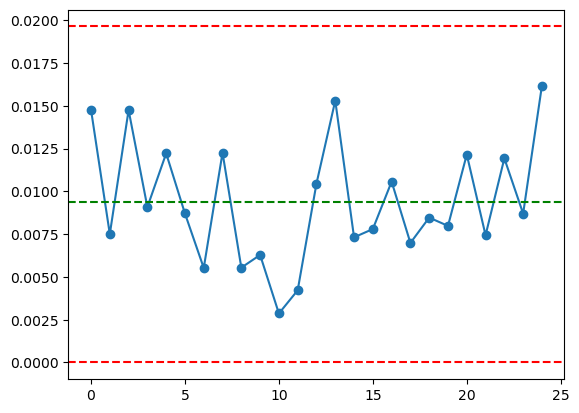

In [26]:
plt.plot(s.index,s,'-o')
plt.axhline(y=UCL_s,color='r',linestyle='--')
plt.axhline(y=LCL_s,color='r',linestyle='--')
plt.axhline(y=CL_s,color='g',linestyle='--')



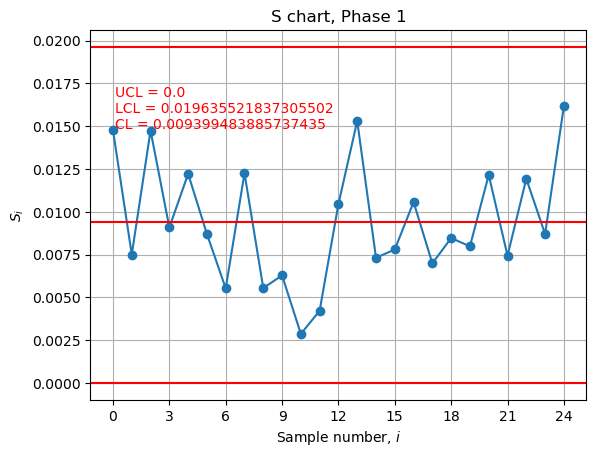

In [18]:
ax = plt.figure().gca()
ax.plot(s.index,s,marker="o")
ax.axhline(y = UCL_s, color = 'r', linestyle = '-')
ax.axhline(y = LCL_s, color = 'r', linestyle = '-')
# add text showing the value of UCL and LCL
ax.text(0.05, 0.85, 'UCL = {}\nLCL = {}\nCL = {}'.format(UCL_s, LCL_s, CL_s),
         verticalalignment='top', horizontalalignment='left',
         transform=ax.transAxes, color='red', fontsize=10)

ax.axhline(y = CL_s, color = 'r', linestyle = '-')
from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.title('S chart, Phase 1')
plt.xlabel('Sample number, $i$')
plt.ylabel('$S_i$')

plt.show()
